# Imports and Datasets


In [1]:
# Imports
import numpy as np
import pandas as pd
from time import time

# Scikit-learn stuff
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [2]:
# Get conductange range data from file set_sweep.csv
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


# Data Preprocessing

Let us first convert resistance values (pre-read and post-read) to conductance values, and scale each column so that the maximum value is 1.

In [3]:
# Convert resistance to conductance
data['preread'] = 1 / data['preread']
data['postread'] = 1 / data['postread']

In [4]:
# Creating scaled versions of the columns which have very large or very small scales
data['scaled_pw'] = data['pw'] / np.max(data['pw'])
data['scaled_preread'] = data['preread'] / np.max(data['preread'])
data['scaled_postread'] = data['postread'] / np.max(data['postread'])

In [5]:
# Take a peek at the preprocessed data
data.head(20)

,addr,pw,vwl,vbsl,preread,postread,scaled_pw,scaled_preread,scaled_postread
0,0,2.000000e-08,0.5,0.5,0.000007,0.000009,0.01,0.034318,0.044375
1,2,2.000000e-08,0.5,1.0,0.000008,0.000008,0.01,0.041906,0.040857
2,4,2.000000e-08,0.5,1.5,0.000008,0.000009,0.01,0.040792,0.047866
3,6,2.000000e-08,0.5,2.0,0.000011,0.000007,0.01,0.055790,0.038148
4,8,2.000000e-08,0.5,2.5,0.000013,0.000017,0.01,0.068648,0.088728
5,10,2.000000e-08,0.5,3.0,0.000010,0.000011,0.01,0.053194,0.055399
6,12,2.000000e-08,0.6,0.5,0.000022,0.000020,0.01,0.112064,0.101366
7,14,2.000000e-08,0.6,1.0,0.000010,0.000007,0.01,0.051746,0.034154
8,16,2.000000e-08,0.6,1.5,0.000005,0.000013,0.01,0.024402,0.067529
9,18,2.000000e-08,0.6,2.0,0.000174,0.000178,0.01,0.903011,0.910478


### Train Test Split
Here, we make a 70%-30% split of the data into training and testing datasets

In [6]:
# Train-test 70%-30% split
x = data[["scaled_preread","scaled_pw","vwl","vbsl"]].to_numpy()
y = data["scaled_postread"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Training/Testing Model

In [7]:
# Training the MLP regressor
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(45, 23),
        learning_rate_init=0.03,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"Done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.5f}")

Training MLPRegressor...
Done in 4.856s
Test R2 score: 0.96434


In [8]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.060925081217161114

In [9]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.003711865521317678

In [28]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(X_test)
predictions_orig = est.predict(X_test)
mean_squared_error(y_test, predictions, squared=False)

0.06042596846965017

In [29]:
y_test_orig = y_test

In [30]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(y_test, predictions, squared=True)

0.0036512976654951563

### Testing on subset of testing data where there was a significant change in conductance (>= 50%)

In [12]:
# Filter the testing data to a subset
# Condition: |preread - postread| >= 50%
condition = (np.abs(X_test[:,0] - y_test) >= 0.5)
cond_X_test, cond_y_test = X_test[condition], y_test[condition]
cond_X_test, cond_y_test

(array([[0.05662796, 0.02      , 2.9       , 2.5       ],
        [0.05354097, 0.2       , 3.3       , 3.        ],
        [0.03979135, 0.5       , 1.8       , 2.        ],
        ...,
        [0.0785674 , 1.        , 2.2       , 2.5       ],
        [0.03845998, 0.02      , 2.9       , 2.        ],
        [0.05285441, 0.1       , 2.8       , 3.        ]]),
 array([0.89600339, 0.83129014, 0.78324301, ..., 0.79498139, 0.78026736,
        0.88830014]))

In [13]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.060925081217161114

In [14]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.003711865521317678

In [15]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(cond_X_test)
mean_squared_error(cond_y_test, predictions, squared=False)

0.05053893522491014

In [16]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(cond_y_test, predictions, squared=True)

0.002554183973667663

### Testing on subset of testing data where there was a miniscule change in conductance (<= 5%)

In [17]:
# Filter the testing data to a subset
# NOTE: the first column of X_test is preread conductance
# Condition: |preread - postread| <= 5%
condition = (np.abs(X_test[:,0] - y_test) <= 0.05)
cond_X_test, cond_y_test = X_test[condition], y_test[condition]
cond_X_test, cond_y_test

(array([[0.8943141 , 0.1       , 2.8       , 0.5       ],
        [0.15029053, 0.2       , 0.5       , 3.        ],
        [0.83693339, 0.1       , 1.4       , 1.        ],
        ...,
        [0.12809017, 0.01      , 1.2       , 1.        ],
        [0.0483151 , 0.1       , 1.6       , 0.5       ],
        [0.07737659, 0.02      , 2.9       , 0.5       ]]),
 array([0.87902953, 0.10470574, 0.80512214, ..., 0.08642385, 0.06558585,
        0.06720146]))

In [18]:
# Root Mean Squared Error (RMSE) on training dataset
predictions = est.predict(X_train)
mean_squared_error(y_train, predictions, squared=False)

0.060925081217161114

In [19]:
# Mean Squared Error (MSE) on training dataset
mean_squared_error(y_train, predictions, squared=True)

0.003711865521317678

In [20]:
# Root Mean Squared Error (RMSE) on testing dataset
predictions = est.predict(cond_X_test)
mean_squared_error(cond_y_test, predictions, squared=False)

0.04661078479942753

In [21]:
# Mean Squared Error (MSE) on testing dataset
mean_squared_error(cond_y_test, predictions, squared=True)

0.0021725652596185445

#Visualizations

In [31]:
#plot predicted conductance values vs real conductance values
df2 = pd.DataFrame(list(zip(y_test_orig, predictions_orig)), columns = ["real","predicted"])
df2

,real,predicted
0,0.896003,0.838833
1,0.831290,0.896759
2,0.783243,0.748381
3,0.786290,0.834359
4,0.879030,0.868268
...,...,...
9826,0.581537,0.543448
9827,0.724983,0.708723
9828,0.794981,0.823460
9829,0.780267,0.768907


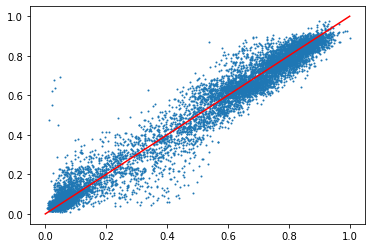

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df2["real"], df2["predicted"], s=1)
plt.plot([0, 1], [0, 1], "r")